In [187]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools
import re
import nltk
from nltk.corpus import stopwords
import nltk as nlp
from nltk.tokenize import sent_tokenize, word_tokenize 
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

In [11]:
episodeIV = pd.read_csv('SW_EpisodeIV.txt', delim_whitespace=True, names=["index","character","dialogue"] ,header = None)
episodeV = pd.read_csv('SW_EpisodeV.txt', delim_whitespace=True, names=["index","character","dialogue"] ,header = None)
episodeVI = pd.read_csv('SW_EpisodeVI.txt', delim_whitespace=True, names=["index","character","dialogue"] ,header = None)

In [15]:
episodeIV.drop(0,inplace=True)
episodeV.drop(0,inplace=True)
episodeVI.drop(0,inplace=True)
episodeIV.drop(["index"],axis=1,inplace=True)
episodeV.drop(["index"],axis=1,inplace=True)
episodeVI.drop(["index"],axis=1,inplace=True)

In [16]:
episodeIV

,character,dialogue
1,THREEPIO,Did you hear that? They've shut down the main...
2,THREEPIO,We're doomed!
3,THREEPIO,There'll be no escape for the Princess this time.
4,THREEPIO,What's that?
5,THREEPIO,I should have known better than to trust the l...
...,...,...
1006,LUKE,"Oh, no!"
1007,THREEPIO,"Oh, my! Artoo! Can you hear me? Say somethi..."
1008,TECHNICIAN,We'll get to work on him right away.
1009,THREEPIO,"You must repair him! Sir, if any of my circui..."


In [17]:
script_numIV=pd.DataFrame(episodeIV.character.value_counts()).iloc[:20]
script_numV=pd.DataFrame(episodeV.character.value_counts()).iloc[:20]
script_numVI=pd.DataFrame(episodeVI.character.value_counts()).iloc[:20]

In [193]:
#character with more dialogues Q1
script_numIV[:3]

,character
LUKE,254
HAN,153
THREEPIO,119


In [194]:
#character with more dialogues Q1
script_numV[:3]

,character
HAN,182
LUKE,128
LEIA,114


In [195]:
#character with more dialogues Q1 
script_numVI[:3]

,character
HAN,124
LUKE,112
THREEPIO,90


In [21]:
#Q2
trace = go.Bar(y=script_numIV.character, x=script_numIV.index,  marker=dict(color="crimson",line=dict(color='black', width=2)))
trace1 = go.Bar(y=script_numV.character,x=script_numV.index,marker=dict(color="blue",line=dict(color='black', width=2)))
trace2 = go.Bar(y=script_numVI.character, x=script_numV.index,marker=dict(color="green",line=dict(color='black', width=2)))


fig = tools.make_subplots(rows=3, cols=1,horizontal_spacing=1, subplot_titles=("A New Hope","The Empire Strikes Back","Return of The Jedi"))
 
fig.append_trace(trace, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)

fig['layout'].update(showlegend=False ,height=800,title="Number of Dialogues According to Character",paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(0, 0, 0)')


iplot(fig)

In [28]:
#Q3
episodeIV["episode"]="A New Hope"
episodeV["episode"]="The Empire Strikes Back"
episodeVI["episode"]="Return of The Jedi"
data=pd.concat([episodeIV,episodeV,episodeVI],axis=0,ignore_index=True)

In [31]:
data

,character,dialogue,episode
0,THREEPIO,Did you hear that? They've shut down the main...,A New Hope
1,THREEPIO,We're doomed!,A New Hope
2,THREEPIO,There'll be no escape for the Princess this time.,A New Hope
3,THREEPIO,What's that?,A New Hope
4,THREEPIO,I should have known better than to trust the l...,A New Hope
...,...,...,...
2518,LANDO,"Wedge, I don't think we're going to make it.",Return of The Jedi
2519,WEDGE,You'll make it. Just follow me Gold Leader.,Return of The Jedi
2520,LANDO,I promised to return his ship without a scratc...,Return of The Jedi
2521,HAN,Lando...,Return of The Jedi


In [81]:
#Q4
data['dialogue'].value_counts(dropna=False)

Yes, sir.                                                                                       9
What?                                                                                           8
Yes.                                                                                            6
Yes, my lord.                                                                                   6
No!                                                                                             5
                                                                                               ..
We're too close.                                                                                1
Patience.                                                                                       1
Secure this area until the alert is canceled.                                                   1
I don't want your help. I want my lamp back. I'll need it to get  out of this slimy mudhole.    1
Are you kidding?  At

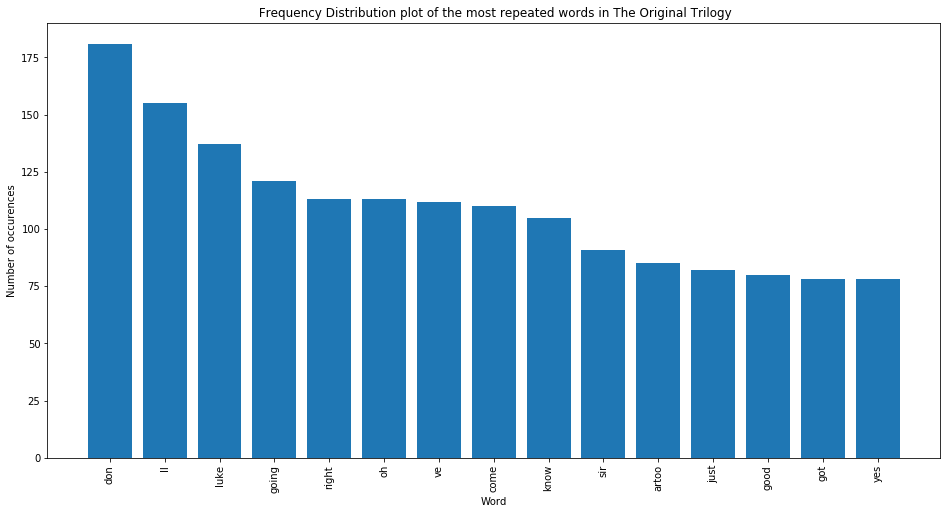

In [79]:
#Q5
count_vectorizer = CountVectorizer(stop_words='english')

words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=data['dialogue'])

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title(' Frequency Distribution plot of the most repeated words in The Original Trilogy');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

In [35]:
#Q6
description_list=[]
for description in data.dialogue:
    description=re.sub("[^a-zA-Z]", " ", description)
    description=description.lower()
    description=nltk.word_tokenize(description)
    description=[word for word in description if not word in set(stopwords.words("english"))]
    lemma=nlp.WordNetLemmatizer()
    description=[lemma.lemmatize(word) for word in description]
    description=" ".join(description)
    description_list.append(description)

In [36]:
data["new_script"]=description_list
data

,character,dialogue,episode,new_script
0,THREEPIO,Did you hear that? They've shut down the main...,A New Hope,hear shut main reactor destroyed sure madness
1,THREEPIO,We're doomed!,A New Hope,doomed
2,THREEPIO,There'll be no escape for the Princess this time.,A New Hope,escape princess time
3,THREEPIO,What's that?,A New Hope,
4,THREEPIO,I should have known better than to trust the l...,A New Hope,known better trust logic half sized thermocaps...
...,...,...,...,...
2518,LANDO,"Wedge, I don't think we're going to make it.",Return of The Jedi,wedge think going make
2519,WEDGE,You'll make it. Just follow me Gold Leader.,Return of The Jedi,make follow gold leader
2520,LANDO,I promised to return his ship without a scratc...,Return of The Jedi,promised return ship without scratch sure hope...
2521,HAN,Lando...,Return of The Jedi,lando


In [82]:
#Q7
data['new_script'].value_counts(dropna=False)

                                                                               65
come                                                                           12
yes sir                                                                        11
right                                                                           9
going                                                                           8
                                                                               ..
sure enough droids                                                              1
talking interested hyperdrive millennium falcon fixed open door stupid lump     1
losing deflector shield go strap going make jump light speed                    1
little one worth effort come let buy something                                  1
wonderful part tribe                                                            1
Name: new_script, Length: 2246, dtype: int64

In [49]:
# Define helper functions
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]


    return (words, word_values[0,:n_top_words].tolist()[0])

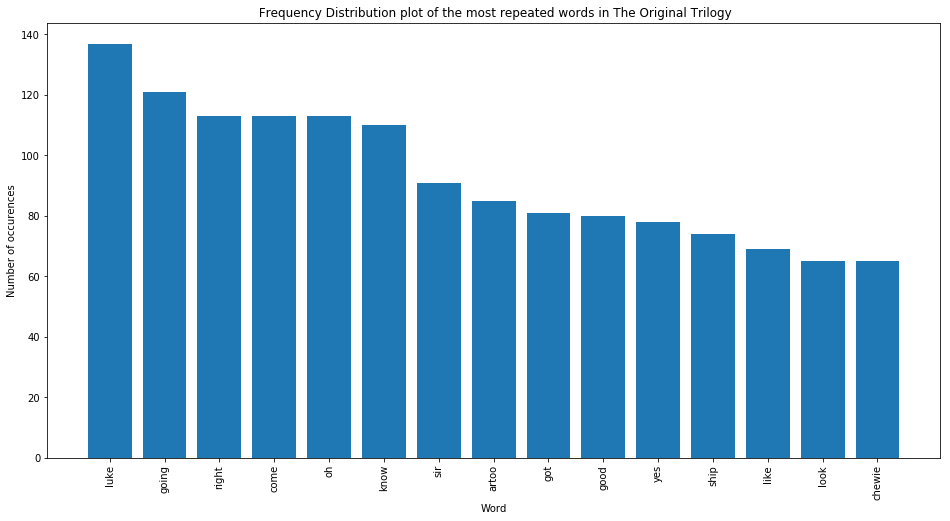

In [83]:
count_vectorizer = CountVectorizer(stop_words='english')

words, word_values = get_top_n_words(n_top_words=15,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=data['new_script'])

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title(' Frequency Distribution plot of the most repeated words in The Original Trilogy');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

In [95]:
#Q8
wave_mask_yoda = np.array(Image.open("yoda.png"))
wave_mask_vader = np.array(Image.open("vader.jpg"))
yoda=data[data.character=="YODA"]
vader=data[data.character=="VADER"]

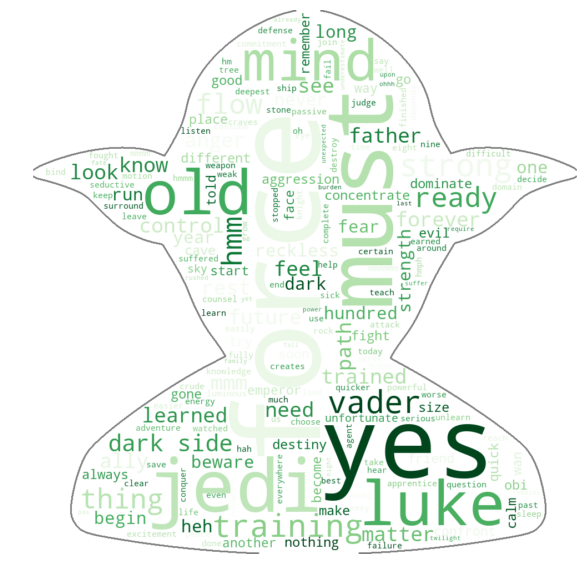

In [92]:
plt.subplots(figsize=(10,10))
stopwords= set(STOPWORDS)
wordcloud = WordCloud(mask=wave_mask_yoda,background_color="white",colormap="Greens" ,contour_width=2, contour_color="gray",
                      width=950,
                          height=950
                         ).generate(" ".join(yoda.new_script))

plt.imshow(wordcloud ,interpolation='bilinear')
plt.axis('off')
plt.show()

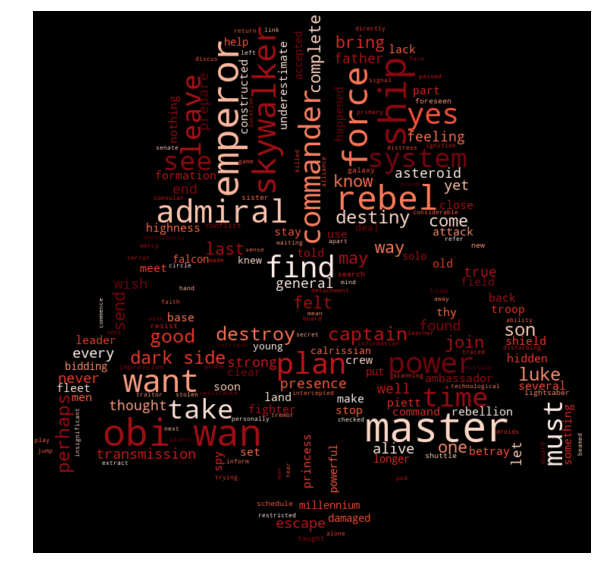

In [99]:
plt.subplots(figsize=(10,10))
stopwords= set(STOPWORDS)
wordcloud = WordCloud(mask=wave_mask_vader,background_color="black",colormap="Reds", contour_color="gray",
                      width=950,
                          height=950
                         ).generate(" ".join(vader.new_script))

plt.imshow(wordcloud ,interpolation='bilinear')
plt.axis('off')
plt.show()

In [196]:
#Q9
max_features = 10

count_vectorizer = CountVectorizer(max_features=max_features,stop_words = "english")

sparce_matrix = count_vectorizer.fit_transform(description_list).toarray()  # x

print("{} most repeated words: {}".format(max_features,count_vectorizer.get_feature_names()))

10 most repeated words: ['artoo', 'come', 'going', 'good', 'got', 'know', 'luke', 'oh', 'right', 'sir']


In [129]:
docs=data['new_script'].tolist() 
cv=CountVectorizer(max_df=0.85)
word_count_vector=cv.fit_transform(docs)
max_features = 10
list = list(cv.vocabulary_.keys())[:10]
print("{} most relevant words: {}".format(max_features,list))

10 most relevant words: ['hear', 'shut', 'main', 'reactor', 'destroyed', 'sure', 'madness', 'doomed', 'escape', 'princess']


In [197]:
#Q10


In [199]:
jedis = ['LUKE', 'BEN', 'YODA']
jedi_speach = data.loc[data['character'].isin(jedis)].new_script.to_list()
siths = ['EMPEROR', 'VADER']
sith_speach = data.loc[data['character'].isin(siths)].new_script.to_list()

sid = SentimentIntensityAnalyzer()

score_jedi = {'neg':0, 'neu':0, 'pos':0, 'compound':0}
n=0
for phrase in jedi_speach:
    if phrase!='':
        n+=1
        score = sid.polarity_scores(phrase)
        for i in score:
            score_jedi[i]+=score[i]
            
for i in score_jedi:
    score_jedi[i] = score_jedi[i]/n
print('Jedi total phrases: {}'.format(n))
        
score_sith = {'neg':0, 'neu':0, 'pos':0, 'compound':0}
n=0
for phrase in sith_speach:
    if phrase!='':
        n+=1
        score = sid.polarity_scores(phrase)
        for i in score:
            score_sith[i]+=score[i]
            
for i in score_sith:
    score_sith[i] = score_sith[i]/n
print('Sith total phrases {}'.format(n))

In [200]:
jedi_score

{'neg': 0.1212893081761006,
 'neu': 0.6969496855345904,
 'pos': 0.18175943396226404,
 'compound': 0.050218553459119485}

In [201]:
sith_score

{'neg': 0.15396132596685086,
 'neu': 0.603453038674033,
 'pos': 0.24259116022099447,
 'compound': 0.06912154696132594}

## 